# Notebook di Training

Installo tutte le librerie necessarie per lo svolgimento del notebook

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install scikit-plot

Importo le librerie necessarie 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

Recupero i dati di train e di test risalenti al file principale che ho suddiviso in due file nel notebook di separazione

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

Do un'occhiata alle features

In [4]:
train

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,8589,15742809,Mironova,712,Spain,Female,29,7,77919.78,1,1,0,122547.58
1,0,3179,15609669,Chuang,542,France,Female,39,4,109949.39,2,1,1,41268.65
2,0,5201,15641298,Corones,512,Germany,Male,42,9,93955.83,2,1,0,14828.54
3,0,8890,15777046,Parry,580,France,Female,39,9,128362.59,1,1,0,86044.98
4,1,5790,15726103,Tsou,689,Germany,Female,55,1,76296.81,1,1,0,42364.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,8872,15699524,Howells,466,France,Female,30,3,0.00,1,1,0,193984.60
5996,0,9827,15686917,Tu,789,Spain,Female,40,4,0.00,2,1,0,137402.27
5997,0,5269,15687648,Nicholson,691,France,Male,28,1,0.00,2,0,0,92865.41
5998,0,9667,15781689,Macadam,758,Spain,Male,35,5,0.00,2,1,0,95009.60


# Grafici ed importanza delle features

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

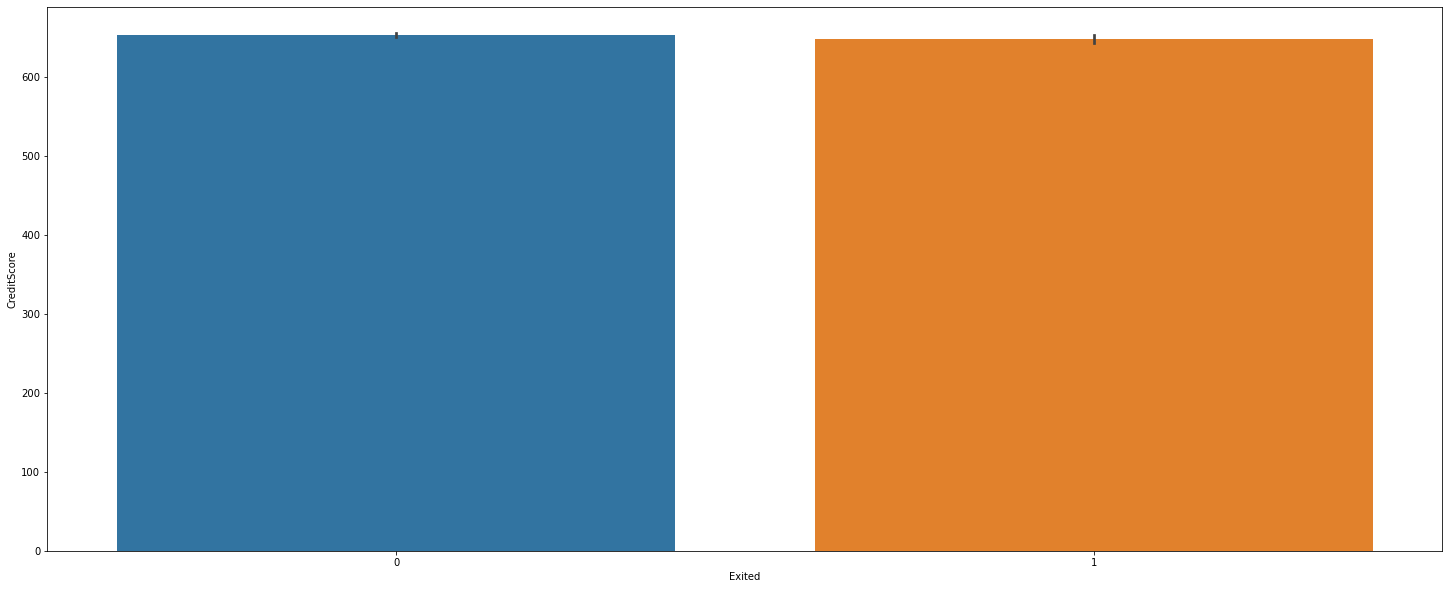

In [5]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Exited', y='CreditScore')

Come possiamo notare il CreditScore non ci da grandissime informazioni sulla variabile target.

<AxesSubplot:xlabel='Age', ylabel='Exited'>

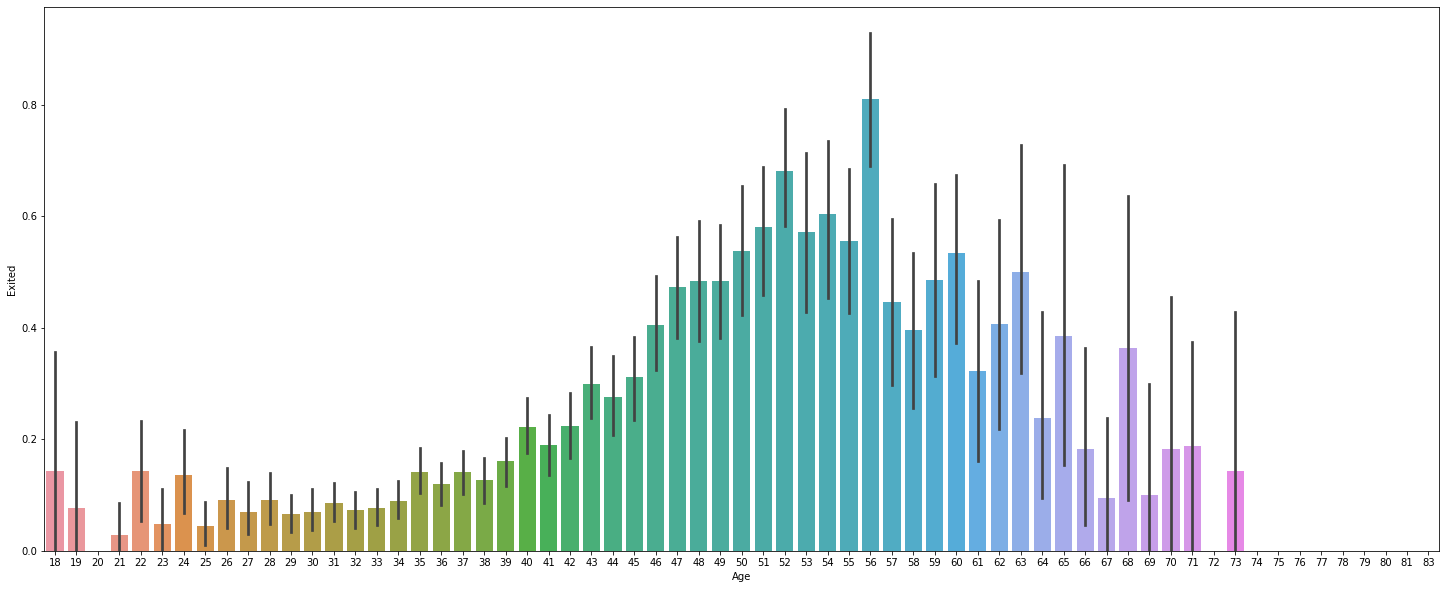

In [6]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Age', y='Exited')

E' evidente che l'età è un fattore fondamentale per predire se un cliente con determinate caratteristiche economiche è destinato a lasciare la banca, generalmente chi ha dai 50 ai 60 anni abbandona con più probabilità la banca rispetto ad un anziano o ad un giovanissimo.

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

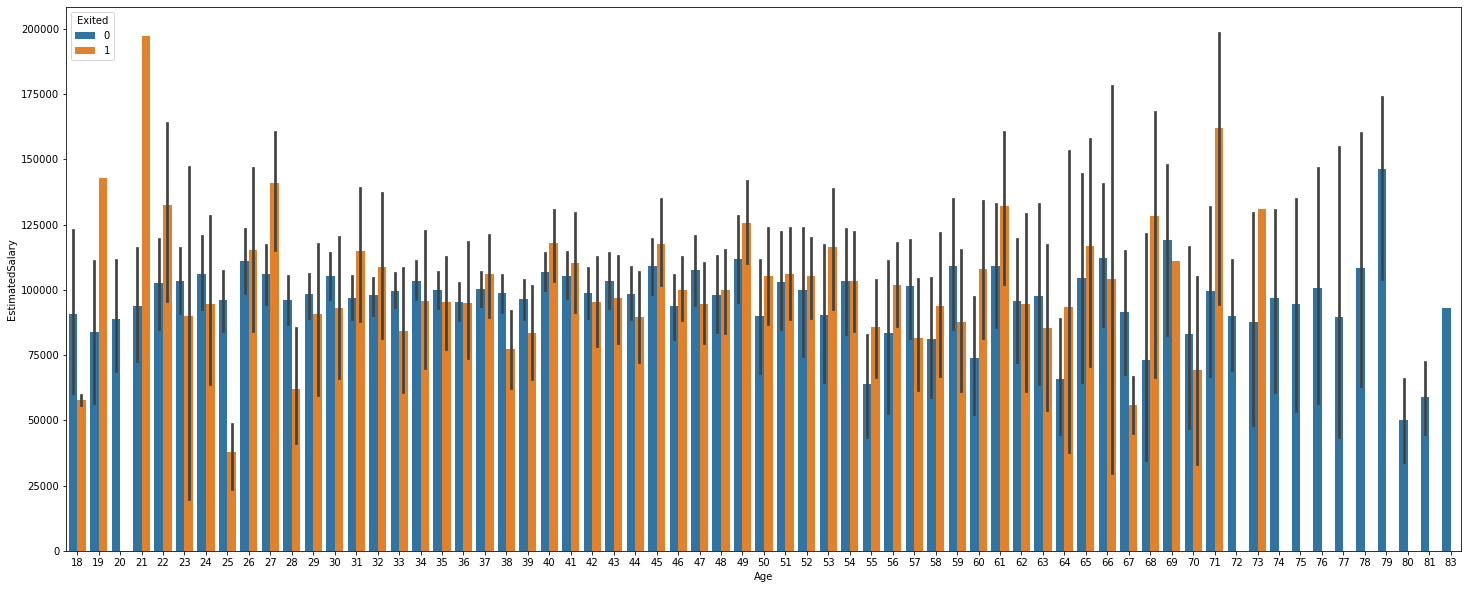

In [7]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Age', y='EstimatedSalary', hue='Exited')

<AxesSubplot:xlabel='Age', ylabel='Balance'>

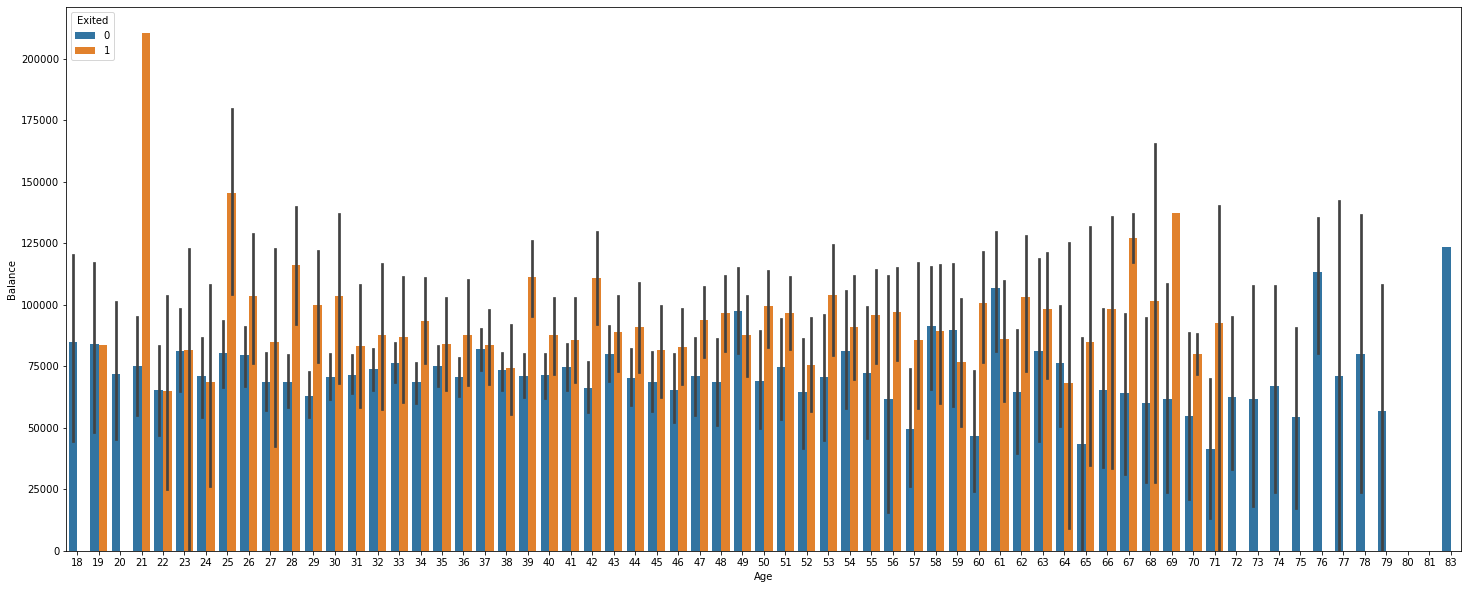

In [8]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Age', y='Balance', hue='Exited')

Abbiamo analizzato l'andamento del bilancio e del Salario rispetto all'età dei clienti, inoltre abbiamo avuto uno spunto cruciale, come possiamo notare, sia nel caso dei ragazzi giovanissimi (18/19 anni) e soprattutto nel caso delle persone anziane (+71 anni) quasi nessuno abbandona la banca, la più alta concentrazione di persone che abbandonano si trova nell'età dai 50 ai 60 anni (come visto nel grafico precedente).


Perciò l'età è molto importante come fattore, direi fondamentale.

Riguardo al salario abbiamo buone informazioni, di media chi ha alto salario è destinato a lasciare la banca.

Identico concetto avviene per il bilancio, nella maggior parte dei casi chi ha bilancio superiore ai 100000 lascerà la banca.

Anche per i valori medio/bassi del bilancio la distinzione appare abbastanza chiara, quasi solitamente chi ha un bilancio medio/basso rimane nella banca.

Distinzione più difficile da fare riguardo al salario stimato dove però rimane il concetto che di solito chi ha salario più alto è destinato a lasciare anche se è molto meno evidente.

Definiamo infatti dei grafici che rendono la nostra idea solo relativamente ad "Exited" con "Balance" ed "Exited" con "EstimatedSalary", vediamo che come descritto, chi ha valori più alti delle due features in media abbandona la banca, anche se in EstimatedSalary la differenza è davvero minima.

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

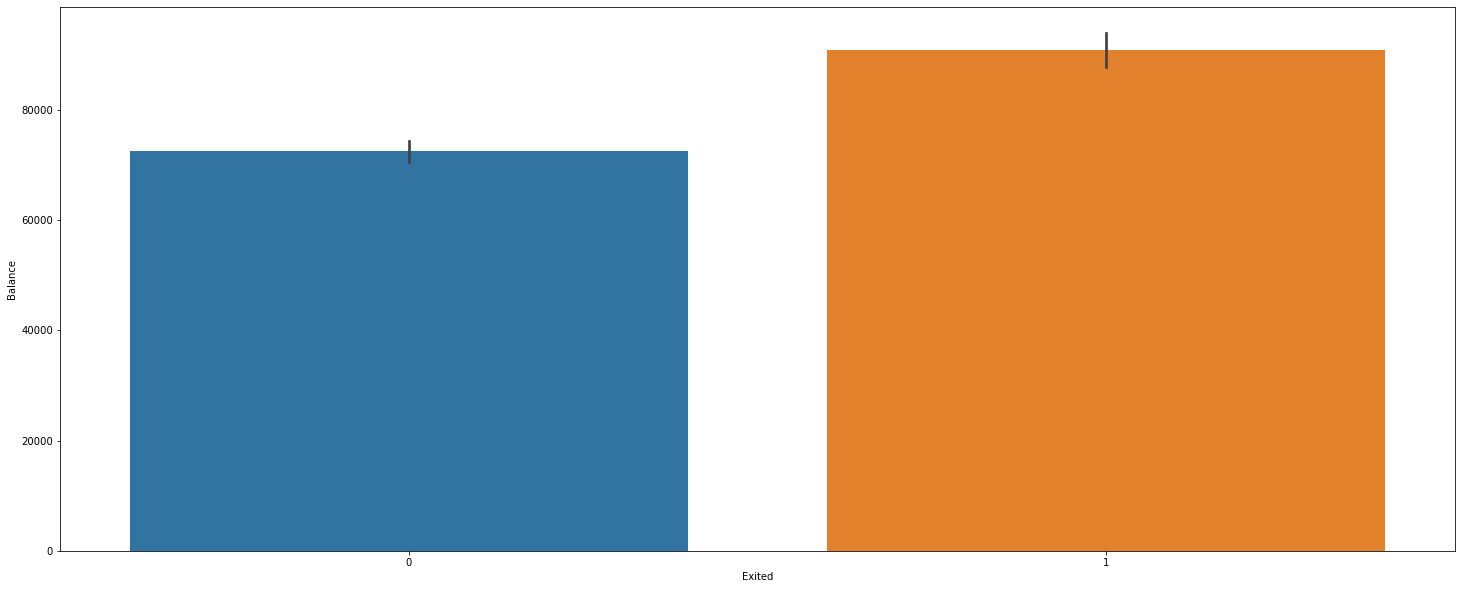

In [9]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Exited', y='Balance')

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

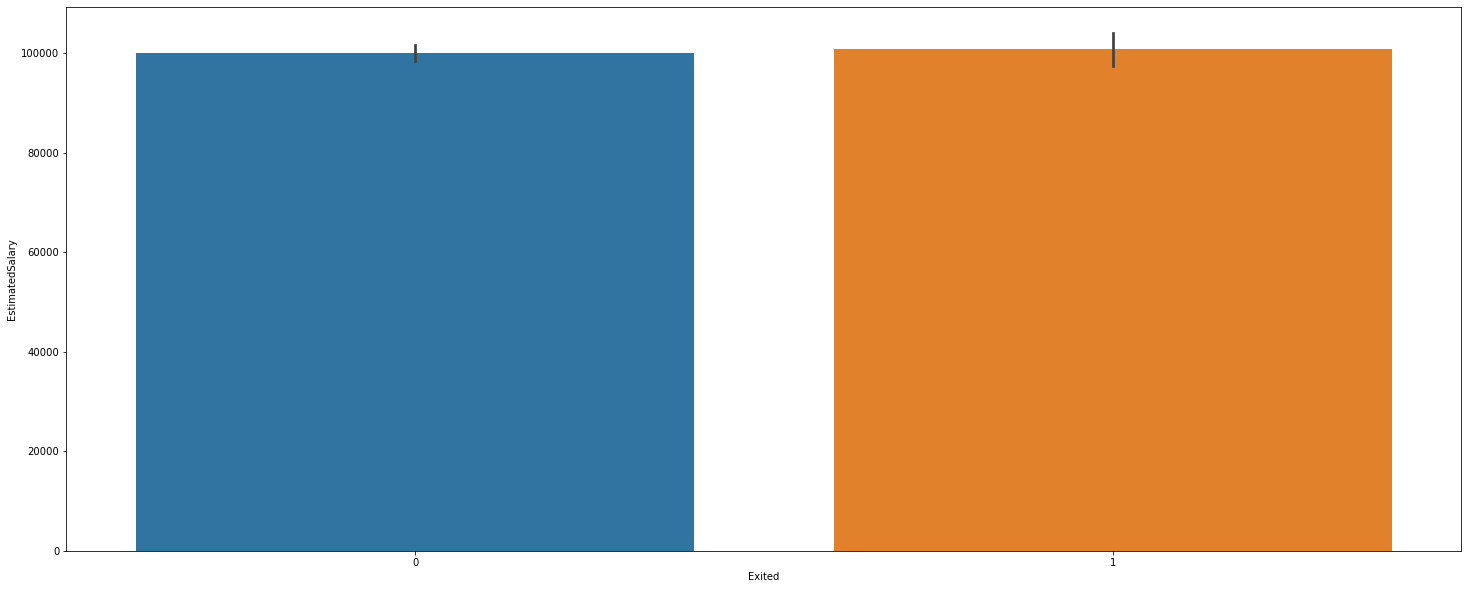

In [10]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Exited', y='EstimatedSalary')

# -----------------------------------------------------------------------------------

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

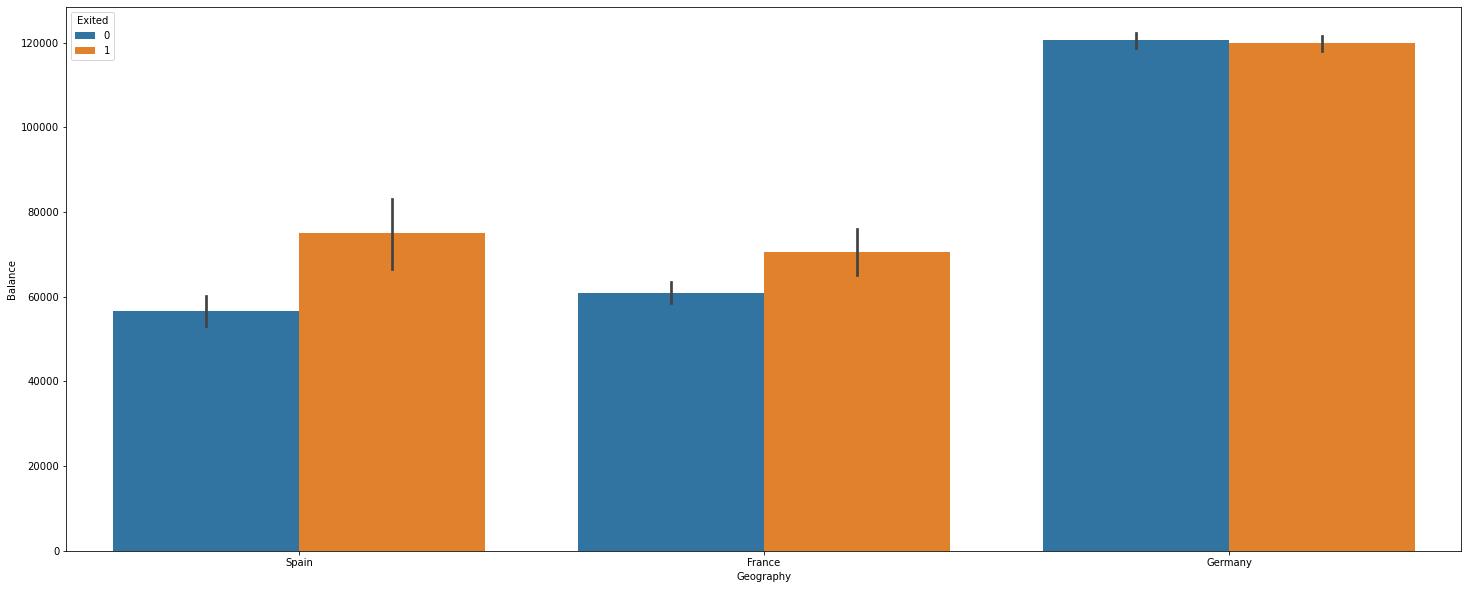

In [11]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Geography', y='Balance', hue='Exited')

<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

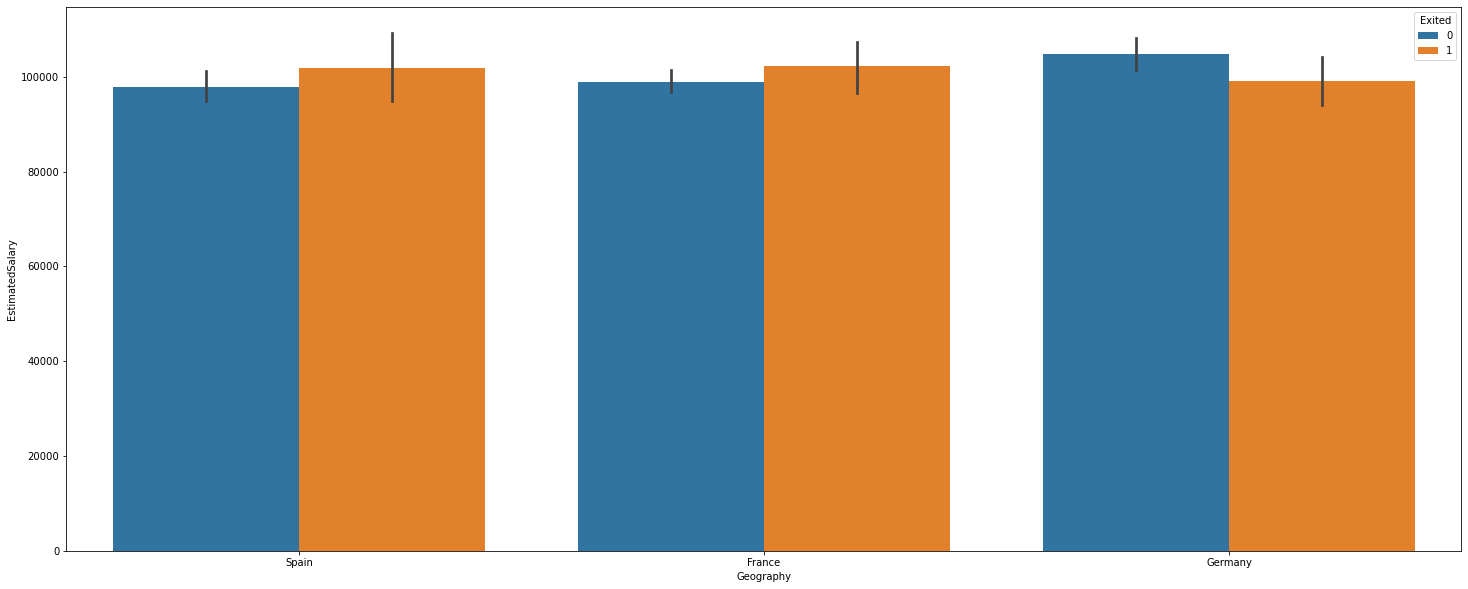

In [12]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Geography', y='EstimatedSalary', hue='Exited')

E' possibile notare che la suddivisione geografica ci da buone info sul bilancio e sulla stima, bilancio e stima che come definito precedentemente sono molto importanti perchè, ad esempio, un alto bilancio generalmente porta all'uscita dalla banca.

Come possiamo notare in Spagna il bilancio è mediamente piu basso e come definito in precedenza chi ha bilancio più basso è destinato a rimanere nella banca, mentre chi ha bilancio più alto tende ad abbandonarla; stesso andamento avviene in Francia.

In Germania c'è una leggera controtendenza, perchè qui chi ha il bilancio più alto preferisce (anche se la differenza mediamente è veramente minima) rimanere nella propria banca ed è semplice notare che mediamente il bilancio in Germania è molto piu alto rispetto a quello degli altri due paesi.

Tendenza confermata anche con la stima del salario anche se qui c'è un bilanciamento maggiore nella Spagna e nella Francia dove chi ha salario piu basso di solito rimane in banca, chi ce l'ha più alto di solito lascia. In Germania la controtendenza è ancora più accentuata, chi ha salario più alto generalmente tende a rimanere!

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

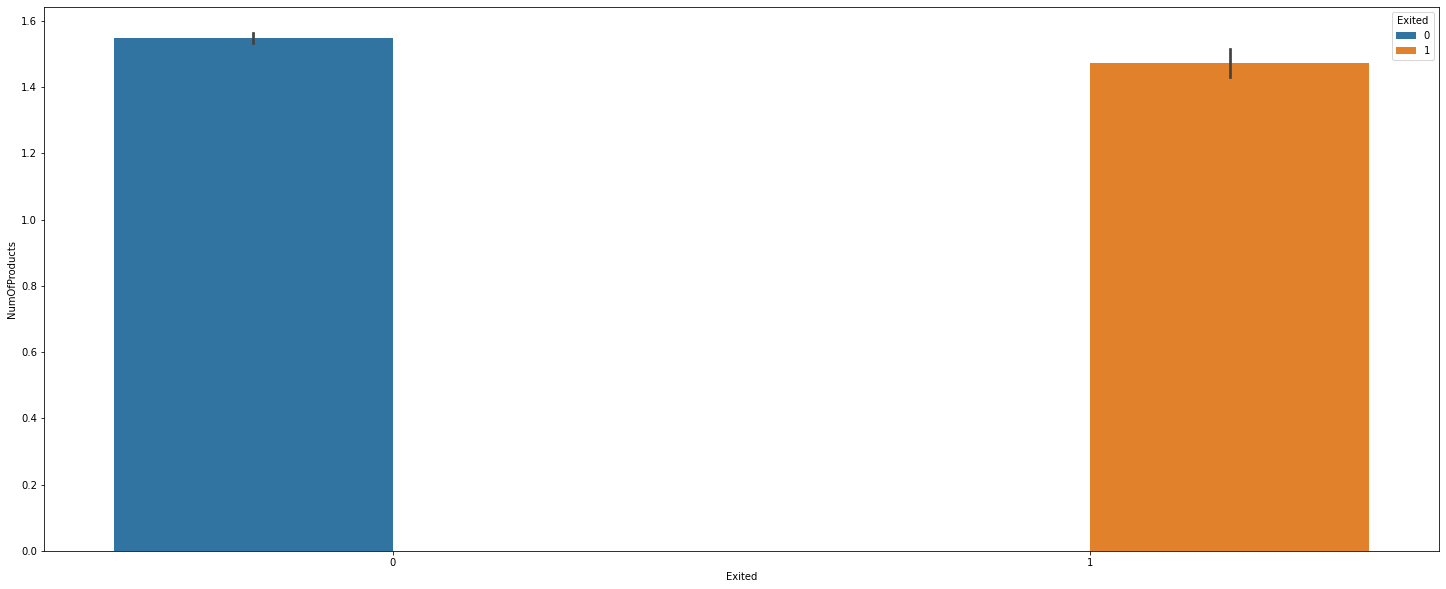

In [13]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Exited', y='NumOfProducts', hue='Exited')

Generalmente, anche se la differenza è poca, chi usa un numero di prodotti finanziari maggiore ha una maggiore tendenza nel rimanere nella banca!

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

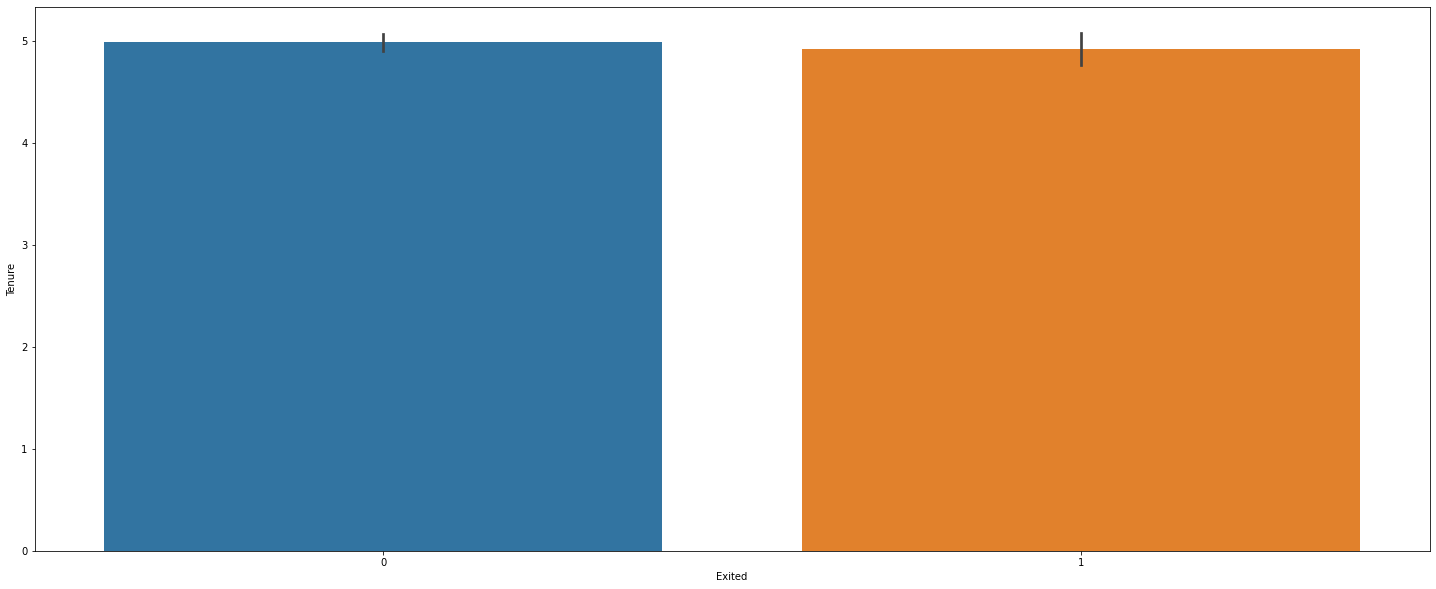

In [14]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Exited', y='Tenure')

Generalmente, chi è cliente da più anni ha una leggera tendenza a rimanere.

<AxesSubplot:xlabel='Exited', ylabel='IsActiveMember'>

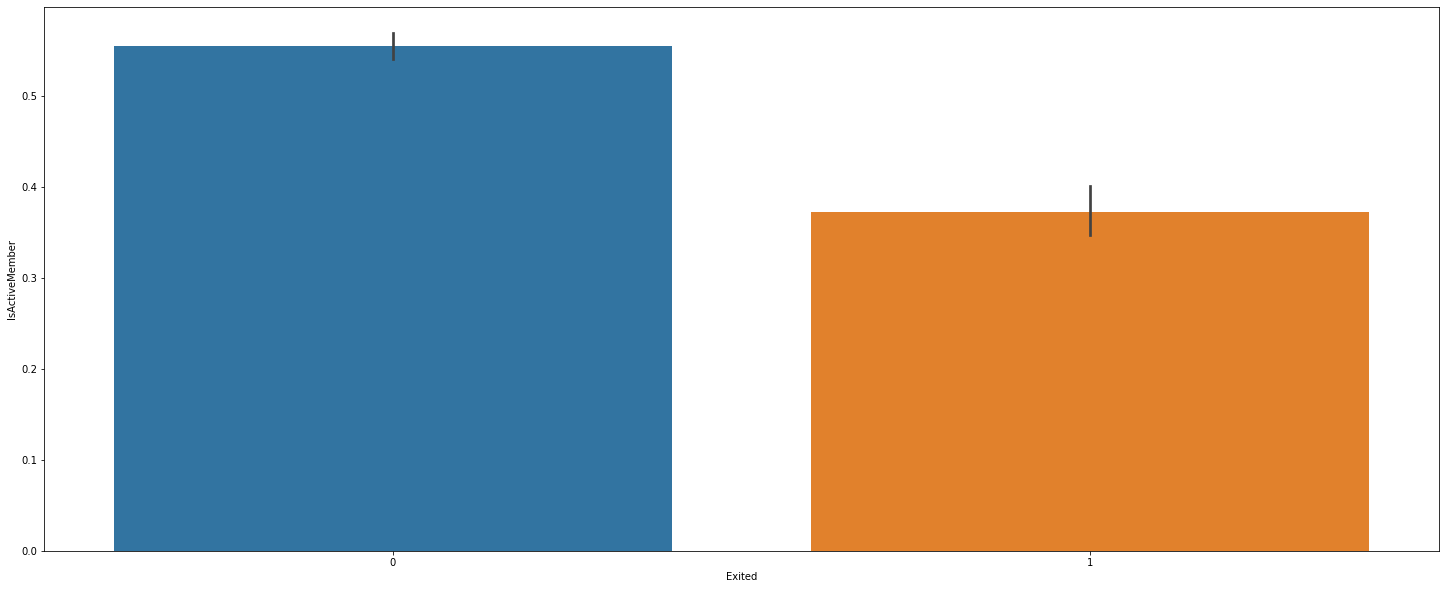

In [15]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Exited', y='IsActiveMember')

E' evidente che chi è un membro attivo è più difficile che abbandoni la banca rispetto ad un membro non più attivo.

<AxesSubplot:xlabel='Exited', ylabel='Gender'>

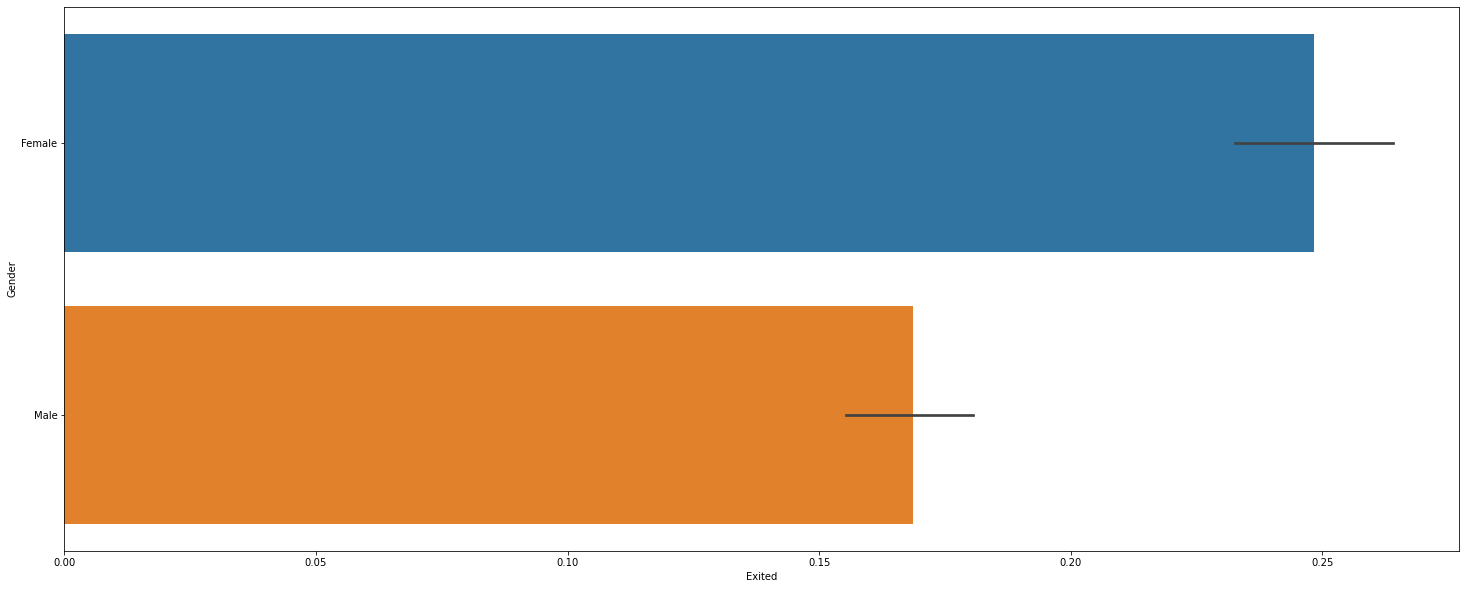

In [41]:
plt.figure(figsize = (25,10))
sns.barplot(data = train, x='Exited', y='Gender')

Anche il sesso ha la sua importanza perchè è possibile notare che generalmente sono le donne che abbandonno con più probabilità la banca!

# Manipolazione dei dati

Posso notare che le features "Surname" e "CustomerId" c'entrano poco con la classificazione "Exited" perciò posso levarle
dall'insieme delle features che utilizzerò per addestrare il mio modello.

Inoltre, suddivido i miei dati in X ed y , la X fa riferimento alle features utilizzate, mentre y fa riferimento al target.

In [16]:
X_train = train.drop(['Exited', 'Surname', 'CustomerId'], axis=1)
y_train = train['Exited']

In [17]:
X_test = test.drop(['Exited', 'Surname', 'CustomerId'], axis=1)
y_test = test['Exited']

# Encoding sulle categorie e le stringhe

Verifico ora come è fatta la tabella dei dati X dopo che sono state tolte le features inutili e la colonna target:

In [18]:
X_train

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,8589,712,Spain,Female,29,7,77919.78,1,1,0,122547.58
1,3179,542,France,Female,39,4,109949.39,2,1,1,41268.65
2,5201,512,Germany,Male,42,9,93955.83,2,1,0,14828.54
3,8890,580,France,Female,39,9,128362.59,1,1,0,86044.98
4,5790,689,Germany,Female,55,1,76296.81,1,1,0,42364.75
...,...,...,...,...,...,...,...,...,...,...,...
5995,8872,466,France,Female,30,3,0.00,1,1,0,193984.60
5996,9827,789,Spain,Female,40,4,0.00,2,1,0,137402.27
5997,5269,691,France,Male,28,1,0.00,2,0,0,92865.41
5998,9667,758,Spain,Male,35,5,0.00,2,1,0,95009.60


Definisco all'interno di "transformers" le trasformazioni che voglio applicare alle mie features.

Definisco all'interno di transformers il nome della trasformazione, la classe di trasformazione (nel mio caso OneHotEncoder) per vettorizzare le colonne 2,3,5 che nel mio caso riguardano "Geography", "Gender" e "Tenure" e "IsActiveMember".

In realtà anche "NumOfproducts", "HasCrCard" possono essere rappresentate come categorie, ma a livello di efficienza dell'algoritmo, effettuando l'encoding di queste 2 suddette categorie, non si ottiene un miglioramento.

La categoria "Tenure" l'ho comunque fatta passare sotto il OneHotEncoding anche se a dir la verità è si una categoria, ma una categoria a rischio per lavorarla con il OneHotEncoding proprio per il fatto che, avendo 10 valori possibili mi crea 10 colonne solamente per lei, però ho un lieve miglioramento in termini di accuracy dell'algoritmo ed avendo eseguito l'encoding su pochi elementi posso permettermela.

Sempre ragionando negli stessi termini, posso dire che per le categorie "Geography" e "Gender" non ci sono problemi di numero di colonne perchè "Geography" assume 3 valori diversi e "Gender" 2.

In [19]:
transformers = [
    ['vectorize_category', OneHotEncoder(), [2,3,5,9]],
    ['scaler', MinMaxScaler(), [4,6,10]]
]

Ho fatto una prova utilizzando il MinMaxScaler nel transformers cioè uno Scaler, ovvero un oggetto che mi permette di portare una serie di numeri su uno stesso range comune, che può essere per esempio tra 0 e 1, la mia idea era di dare la stessa importanza a numeri di grandezza molto diversa agli occhi dell'algoritmo che poi ho utilizzato nel modello.

"Age" ha una grande importanza come valore, ma agli occhi dell'algoritmo potrebbe averne di meno rispetto ad esempio a "Balance" o ad "EstimatedSalary" che hanno valori molto piu grandi, ma, sappiamo che al contrario degli algoritmi come KNN o ad esempio quelli basati sulle Reti Neurali, gli algoritmi basati sull'idea degli alberi di decisione difficilmente soffrono del fenomeno di "Scaling" infatti il risultato a livello di accuracy applicando lo Scaling non variava praticamente per niente (utilizzando la RandomForest), ma utilizzando il GradientBoost come algoritmo, ho notato che c'è un incremento di quasi mezzo punto percentuale dell'accuracy, e, avendo scelto proprio GradientBoost come algoritmo, ho quindi applicato questo scaling sull'età, il bilancio e la stima del salario!

Il ColumnTransformer è un costrutto che mi permette di operare una serie di trasformazioni definite nella variabile "transformers".

Permette di effettuare una serie di modifiche in maniera semplice ed efficace sui dati, come ad esempio lo Scaling, l'Encoding, ecc...

Tutto ciò è possibile grazie all'utilizzo del suo metodo "fit_transform" che applica ai suddetti dati le trasformazioni specificate.

"remainder=passthrough" serve a specificare che ci interessano anche le colonne che non abbiamo trasformato che dunque non vengono omesse.

In [20]:
ct = ColumnTransformer(transformers, remainder='passthrough')

In [21]:
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

Verifico come sono strutturate dopo la trasformazione le X di training e di test.

In [22]:
X_train

array([[  0.,   0.,   1., ..., 712.,   1.,   1.],
       [  1.,   0.,   0., ..., 542.,   2.,   1.],
       [  0.,   1.,   0., ..., 512.,   2.,   1.],
       ...,
       [  1.,   0.,   0., ..., 691.,   2.,   0.],
       [  0.,   0.,   1., ..., 758.,   2.,   1.],
       [  1.,   0.,   0., ..., 545.,   2.,   0.]])

In [23]:
X_test

array([[  1.,   0.,   0., ..., 801.,   1.,   1.],
       [  0.,   1.,   0., ..., 766.,   1.,   0.],
       [  0.,   0.,   1., ..., 828.,   1.,   1.],
       ...,
       [  0.,   0.,   1., ..., 621.,   1.,   0.],
       [  0.,   1.,   0., ..., 699.,   2.,   1.],
       [  1.,   0.,   0., ..., 597.,   2.,   1.]])

L'ultimo appunto riguardo l'elaborazione e la modifica dei dati riguarda i valori mancanti, in questo file csv non ci sono valori mancanti all'interno delle colonne trattate perciò non effettuo nessuna operazione.

In [24]:
print(train.isnull().sum())
print('\n')
print(test.isnull().sum())

Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


Definite la separazione delle features dal target ed eseguite tecniche per migliorare l'insieme dei dati, definisco il modello.

# Modello

L'algoritmo Random Forest è un algoritmo di apprendimento supervisionato.

Una foresta casuale combina molti alberi decisionali in un unico modello. Individualmente, le previsioni fatte dagli alberi decisionali potrebbero non essere accurate, ma combinate insieme, le previsioni saranno in media più vicine al risultato.

Il risultato finale restituito dal Random Forest altro non è che la media del risultato numerico restituito dai diversi alberi nel caso di un problema di regressione, o la classe restituita dal maggior numero di alberi nel caso la Random Forest sia stata utilizzata per risolvere un problema di classificazione.

Ho testato che, per il seguente task, il DecisionTreeClassifier ha prestazioni nettamente inferiori rispetto al RandomForestClassifier, parliamo di una accuracy (di testing) del 75% circa per il DecisionTree mentre dell'86% circa per il RandomForest.

Il parametro "n_estimators" indica il numero di alberi nella "foresta" cioè sfruttati dal modello, mentre il parametro "criterion" indica il criterio sfruttato dall'algoritmo, in questo caso l'entropia.

Con il metodo "fit" effettuiamo l'addestramento del modello sui dati di training.

In [25]:
model = RandomForestClassifier(n_estimators=150, criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

Effettuo delle predictions relativamente al training (anche se non molto utile) ed al testing (il fulcro del task), utilizzando il metodo "predict" che mi da la previsione del modello relativamente ai dati che gli vengono passati.

In [26]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

Verifico poi il valore della accuracy ottenuta, sia lato training che testing.
Per accuracy si intende il rapporto delle classificazioni giuste rispetto a tutte le classificazioni effettuate.

In [27]:
train_accuracy = accuracy_score(y_train, train_prediction)
test_accuracy = accuracy_score(y_test, test_prediction)

In [28]:
print('Accuracy Training: ', train_accuracy)
print('Accuracy Testing: ', test_accuracy)

Accuracy Training:  1.0
Accuracy Testing:  0.8615


Come possiamo notare l'accuracy per il training è prossima al 100% perchè la effettuo sui dati di addestramento e quindi
è come se imparasse a memoria le risposte.

La accuracy per il testing, cioè quella che effettivamente ci interessa, è pari a circa l'86% ed è un buon valore, vuol dire che 
su 100 clienti 86 li classifica in maniera giusta.

Sfrutto il Classification Report che mi da una panoramica non solo sull'accuracy ma anche sulla precision, la recall e la f1
che rappresenta la media armonica della precision e della recall.

La sfrutto sia sul training (non molto utile ma solo per una panoramica in più) che sul testing. 


In [29]:
report_train = classification_report(y_train, train_prediction)
print('Report Train: ', report_train)
report_test = classification_report(y_test, test_prediction)
print('Report Test: ', report_test)

Report Train:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4769
           1       1.00      1.00      1.00      1231

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Report Test:                precision    recall  f1-score   support

           0       0.86      0.99      0.92      1587
           1       0.88      0.38      0.53       413

    accuracy                           0.86      2000
   macro avg       0.87      0.68      0.73      2000
weighted avg       0.86      0.86      0.84      2000



Utilizzo un grafico "Confusion Matrix" ovvero la matrice di confusione che verifica per ogni classificazione, nel nostro caso per 0 o 1 
quante delle label predette sono state assegnate alla suddetta classe predetta.

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

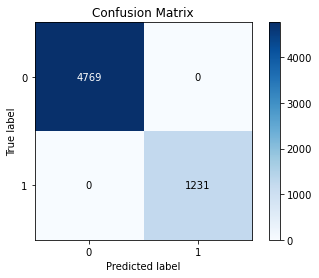

In [30]:
skplt.metrics.plot_confusion_matrix(y_train, train_prediction)

Nel caso del training è semplice, vediamo che relativamente al valore di Exited = 0 ho "preso" tutti i valori, stessa cosa per Exited = 1, cioè ho predetto in maniera corretta tutti i valori di target. 

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

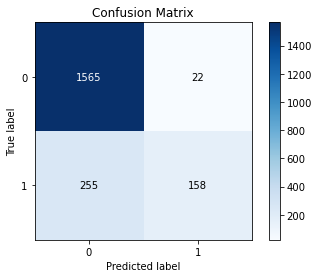

In [31]:
skplt.metrics.plot_confusion_matrix(y_test, test_prediction)

Nel caso del testing, vediamo che relativamente al valore di Exited = 0 il mio modello ha "preso" quasi tutti i valori "giusti", su 1800 valori circa, ne ha sbagliati intorno ai 200, sbagliati perchè li aveva predetti come Exited = 0 ma in realtà erano relativi ad Exited = 1.

Per Exited = 1 ho una previsione peggiore in rapporto anche perchè i valori con Exited = 1 sono di meno e sbagliare anche poco qui ha un peso maggiore, siamo a circa 30 errori su 200 valori circa. 

Come specificato anche sopra nelle descrizioni ho fatto piu prove con diversi algoritmi, ma ho deciso di lasciarne uno cioè questo del GradientBoosting perchè mi sembra tra i piu interessanti (insieme al RandomForest) per la classificazione.


----------------------------------------



Il GradientBoost sfrutta il concetto del gradiente definito nel corso.

In termini di performance non c'è una grande differenza tra i due algoritmi, siamo su circa l'86% di accuracy, ma a livello di training impara meno a memoria i dati e quindi non ha il valore dell'accuracy pari al 100% come l'altro, qui ha circa l'88%.

Un concetto importante sul quale focalizzarci è relativo al fatto che analizzando la matrice di confusione vediamo che rispetto a quella mostrata per la RandomForest si ha una efficienza nell' "azzeccare" le label leggermente maggiore, quindi sembra tutto sommato anche migliore del RandomForest, questo è un buon risultato che mi fa rimanere in bilico nella scelta dei due algoritmi.

Scelgo quindi il GradientBoostingClassifier che ha anche un leggero margine di miglioramento, siamo comunque con entrambi all'86% di accuracy, con il GradientBoosting molto prossimo all'87%, perciò scegliere l'uno o l'altro fa poco in termini di efficienza.

Perciò lascio aperto l'esempio del RandomForestClassifier per fare le comparazioni anche se la mia scelta è il GradientBoostClassifier!

In [32]:
model2 = GradientBoostingClassifier(learning_rate=0.1)
model2.fit(X_train, y_train)

GradientBoostingClassifier()

In [33]:
train_prediction_2 = model2.predict(X_train)
test_prediction_2 = model2.predict(X_test)

In [34]:
train_accuracy_2 = accuracy_score(y_train, train_prediction_2)
test_accuracy_2 = accuracy_score(y_test, test_prediction_2)

In [35]:
print('Accuracy Training: ', train_accuracy_2)
print('Accuracy Testing: ', test_accuracy_2)

Accuracy Training:  0.8765
Accuracy Testing:  0.868


In [36]:
report_train_2 = classification_report(y_train, train_prediction_2)
print('Report Train: ', report_train_2)
report_test_2 = classification_report(y_test, test_prediction_2)
print('Report Test: ', report_test_2)

Report Train:                precision    recall  f1-score   support

           0       0.88      0.97      0.93      4769
           1       0.83      0.50      0.63      1231

    accuracy                           0.88      6000
   macro avg       0.85      0.74      0.78      6000
weighted avg       0.87      0.88      0.86      6000

Report Test:                precision    recall  f1-score   support

           0       0.87      0.98      0.92      1587
           1       0.88      0.42      0.57       413

    accuracy                           0.87      2000
   macro avg       0.87      0.70      0.74      2000
weighted avg       0.87      0.87      0.85      2000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

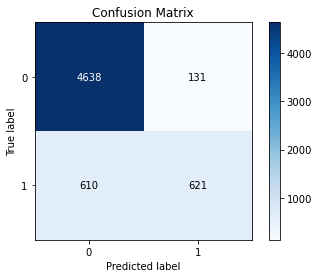

In [37]:
skplt.metrics.plot_confusion_matrix(y_train, train_prediction_2)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

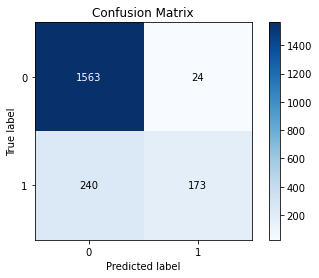

In [38]:
skplt.metrics.plot_confusion_matrix(y_test, test_prediction_2)

Conclusione: vista la grande quantità di dati, possiamo ritenerci soddisfatti nell'avere una accuracy non lontana dal 90%, riusciamo quindi a predire in maniera molto accurata i clienti che vogliono rimanere o lasciare la nostra banca basandoci sulle caratteristiche dei clienti che ci sono state assegnate! 